In [1]:
import pandas as pd

In [4]:
df1 = pd.read_csv('C:/Users/Saurabh/OneDrive - iitgn.ac.in/Desktop/Imbesideu/Transcript_data/1.csv')
df2 = pd.read_csv('C:/Users/Saurabh/OneDrive - iitgn.ac.in/Desktop/Imbesideu/Transcript_data/2.csv')
df3 = pd.read_csv('C:/Users/Saurabh/OneDrive - iitgn.ac.in/Desktop/Imbesideu/Transcript_data/3.csv')
df4 = pd.read_csv('C:/Users/Saurabh/OneDrive - iitgn.ac.in/Desktop/Imbesideu/Transcript_data/4.csv')
df5 = pd.read_csv('C:/Users/Saurabh/OneDrive - iitgn.ac.in/Desktop/Imbesideu/Transcript_data/5.csv')
df6 = pd.read_csv('C:/Users/Saurabh/OneDrive - iitgn.ac.in/Desktop/Imbesideu/Transcript_data/6.csv')
df7 = pd.read_csv('C:/Users/Saurabh/OneDrive - iitgn.ac.in/Desktop/Imbesideu/Transcript_data/7.csv')
df8 = pd.read_csv('C:/Users/Saurabh/OneDrive - iitgn.ac.in/Desktop/Imbesideu/Transcript_data/8.csv')
df9 = pd.read_csv('C:/Users/Saurabh/OneDrive - iitgn.ac.in/Desktop/Imbesideu/Transcript_data/9.csv')
df10 = pd.read_csv('C:/Users/Saurabh/OneDrive - iitgn.ac.in/Desktop/Imbesideu/Transcript_data/10.csv')

In [7]:
print(df1.columns)

Index(['id', 'seek', 'start', 'end', 'text', 'tokens', 'temperature',
       'avg_logprob', 'compression_ratio', 'no_speech_prob', 'positive',
       'negative', 'neutral', 'confident', 'hesitant', 'concise',
       'enthusiastic', 'speech_speed'],
      dtype='object')


In [6]:
df1.describe()

,seek,start,end,temperature,avg_logprob,compression_ratio,no_speech_prob,positive,negative,neutral,confident,hesitant,concise,enthusiastic,speech_speed
count,18.000000,18.000000,18.000000,18.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,3009.333333,41.002222,45.931111,0.0,-0.286234,1.590646,0.722129,0.684102,0.141900,0.146156,0.707553,0.473953,0.421579,0.457487,2.988080
std,2598.468689,26.117009,26.294913,0.0,0.137659,0.367375,0.234874,0.225898,0.146584,0.078116,0.229434,0.251729,0.260259,0.273786,0.798763
min,0.000000,0.000000,5.560000,0.0,-0.447179,0.148591,0.036593,0.207253,0.004977,0.014633,0.208330,0.008425,0.012767,0.088580,0.599958
25%,0.000000,19.680000,24.400000,0.0,-0.447179,1.649819,0.635880,0.572781,0.045810,0.080954,0.561481,0.319862,0.270302,0.213475,2.513489
50%,2776.000000,40.560000,46.640000,0.0,-0.278873,1.651235,0.833173,0.718849,0.090663,0.151074,0.754068,0.407792,0.426497,0.418900,3.095347
75%,5336.000000,62.420000,66.660000,0.0,-0.196253,1.785235,0.910383,0.869267,0.156902,0.221425,0.898539,0.664994,0.567060,0.660853,3.557692
max,8272.000000,82.720000,88.720000,0.0,0.107591,1.785235,0.910383,0.980389,0.532010,0.267454,0.980931,0.845698,0.919735,0.990310,4.166667


In [8]:
columns_for_EDA=['positive','negative','neutral','confident','hesitant','concise','enthusiastic','speech_speed']

In [7]:
with pd.ExcelWriter("C:/Users/Saurabh/OneDrive - iitgn.ac.in/Desktop/Imbesideu/EDA/tran_avg.xlsx") as writer:
    df1[columns_for_EDA].mean().to_excel(writer,sheet_name='1')
    df2[columns_for_EDA].mean().to_excel(writer,sheet_name='2')
    df3[columns_for_EDA].mean().to_excel(writer,sheet_name='3')
    df4[columns_for_EDA].mean().to_excel(writer,sheet_name='4')
    df5[columns_for_EDA].mean().to_excel(writer,sheet_name='5')
    df6[columns_for_EDA].mean().to_excel(writer,sheet_name='6')
    df7[columns_for_EDA].mean().to_excel(writer,sheet_name='7')
    df8[columns_for_EDA].mean().to_excel(writer,sheet_name='8')
    df9[columns_for_EDA].mean().to_excel(writer,sheet_name='9')
    df10[columns_for_EDA].mean().to_excel(writer,sheet_name='10')

In [12]:

excel_file_path = "C:/Users/Saurabh/OneDrive - iitgn.ac.in/Desktop/Imbesideu/EDA/tran_avg.xlsx"

# Read the first 10 worksheets into a dictionary of DataFrames
sheet_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
sheet_data = {}

for sheet_name in sheet_names:
    sheet_data[sheet_name] = pd.read_excel(excel_file_path, sheet_name=sheet_name)

# Define the columns for which you want to calculate the weighted mean
weighted_columns = ['Average']

# Calculate the weighted means for each sheet
weighted_means = {}
for sheet_name, df in sheet_data.items():
    # Calculate the weighted mean for each column
    weighted_values = df[weighted_columns].mul(df['Weight'], axis=0) 
    total_weights = df['Weight'].sum() 
    weighted_mean = weighted_values.sum() / total_weights
    weighted_means[sheet_name] = weighted_mean

# Create a DataFrame for the 11th worksheet with the weighted means
W_means = pd.DataFrame({'Worksheet Name': list(weighted_means.keys()), 'Weighted Mean': list(weighted_means.values())})

# Open the Excel file again to write the 11th worksheet
with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='a') as writer:
    W_means.to_excel(writer, sheet_name='weighted_means', index=False)

print("Weighted means added to Sheet11 in the Excel file.")


Weighted means added to Sheet11 in the Excel file.


In [15]:
df = pd.read_excel("C:/Users/Saurabh/OneDrive - iitgn.ac.in/Desktop/Imbesideu/EDA/tran_avg.xlsx",sheet_name='weighted_means')
df_sorted= df.sort_values(by='Weighted Mean', ascending=False)

In [16]:
import matplotlib.pyplot as plt

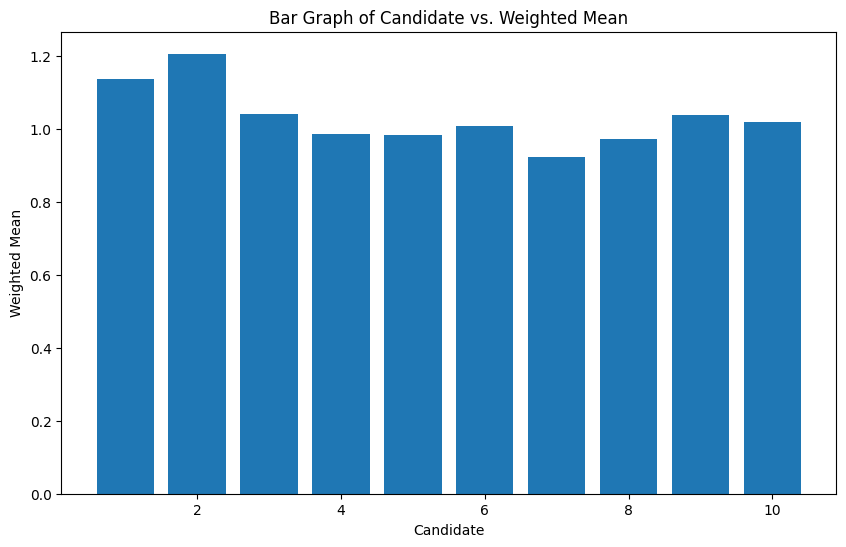

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Candidate'], df_sorted['Weighted Mean'])
plt.xlabel('Candidate')
plt.ylabel('Weighted Mean')
plt.title('Bar Graph of Candidate vs. Weighted Mean')
plt.xticks(rotation=0)
plt.show()

In [3]:
dft_individual_parameters = pd.read_excel("C:/Users/Saurabh/OneDrive - iitgn.ac.in/Desktop/Imbesideu/EDA/tran_avg.xlsx",sheet_name="individual_parameters",engine="openpyxl")

In [4]:
import matplotlib.pyplot as plt

In [5]:
dft_individual_parameters.columns

Index(['Candidate', 'positive', 'negative', 'neutral', 'confident', 'hesitant',
       'concise', 'enthusiastic', 'speech_speed'],
      dtype='object')

In [6]:
parameters = ['positive', 'negative', 'neutral', 'confident', 'hesitant','concise', 'enthusiastic', 'speech_speed']

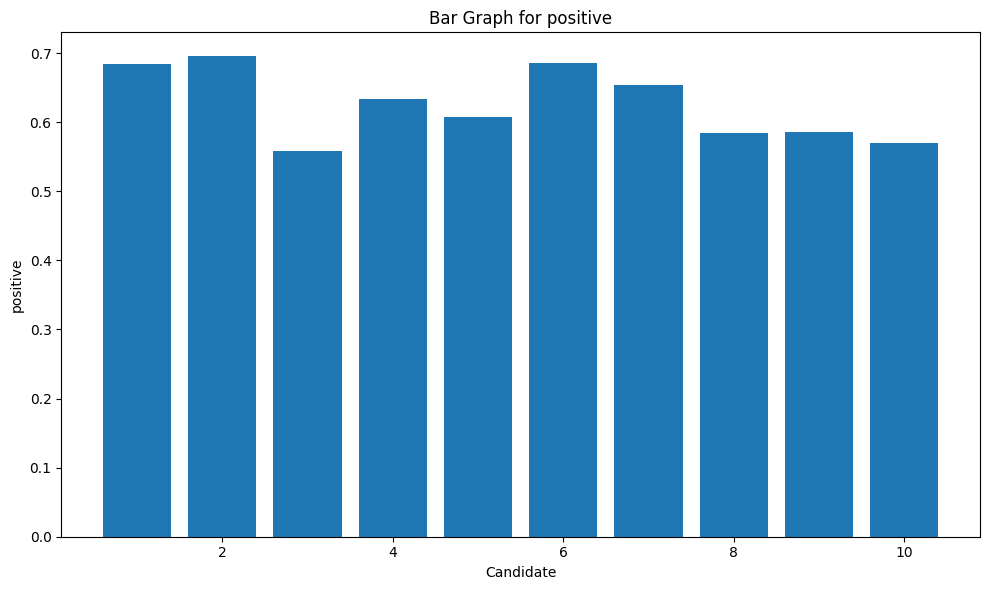

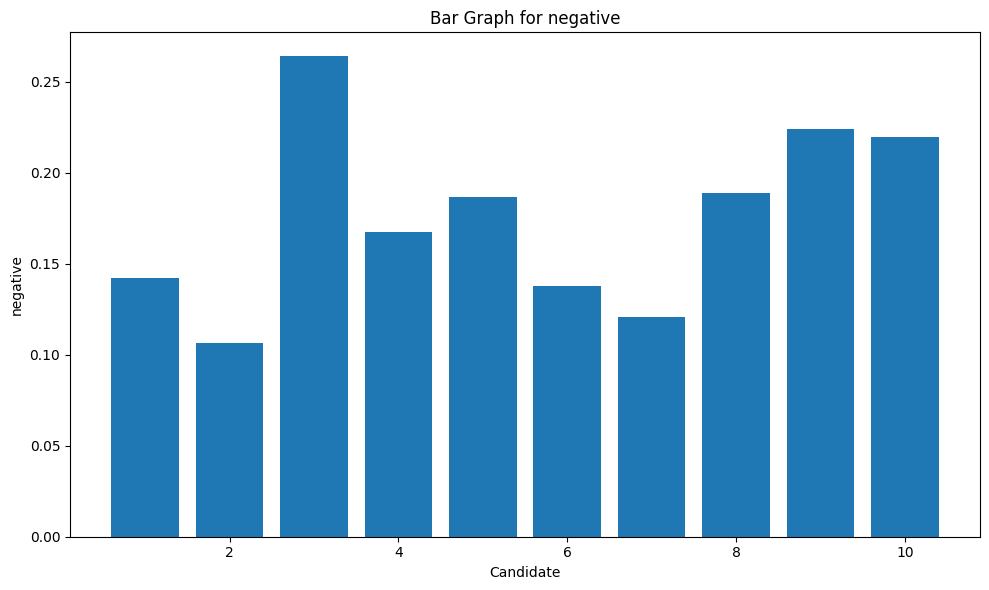

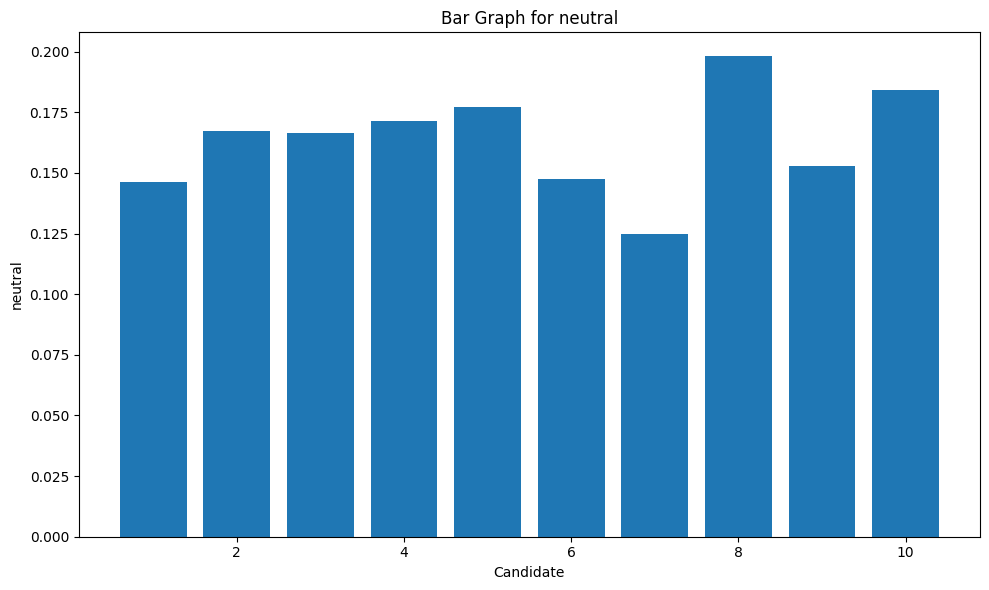

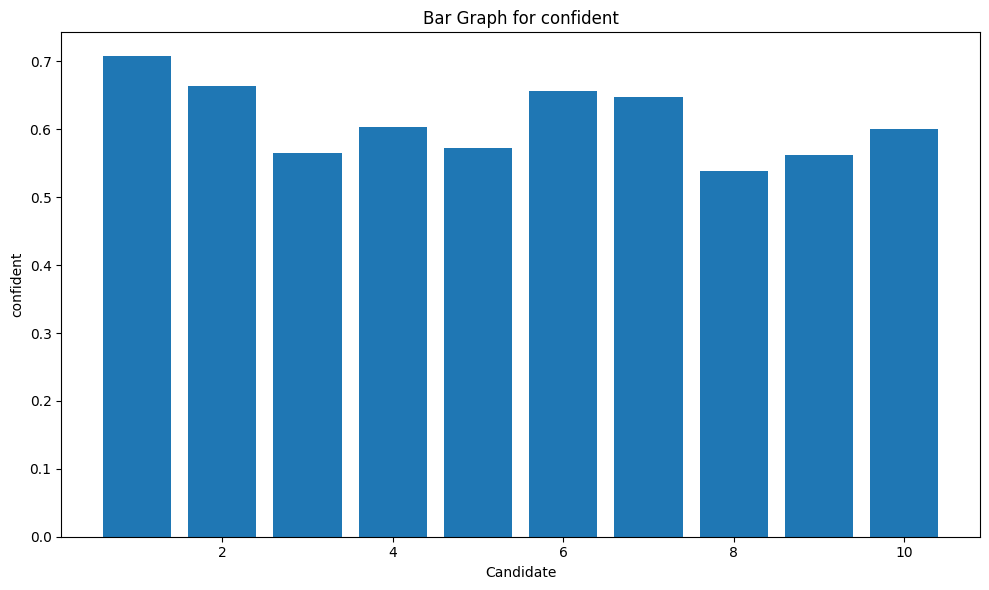

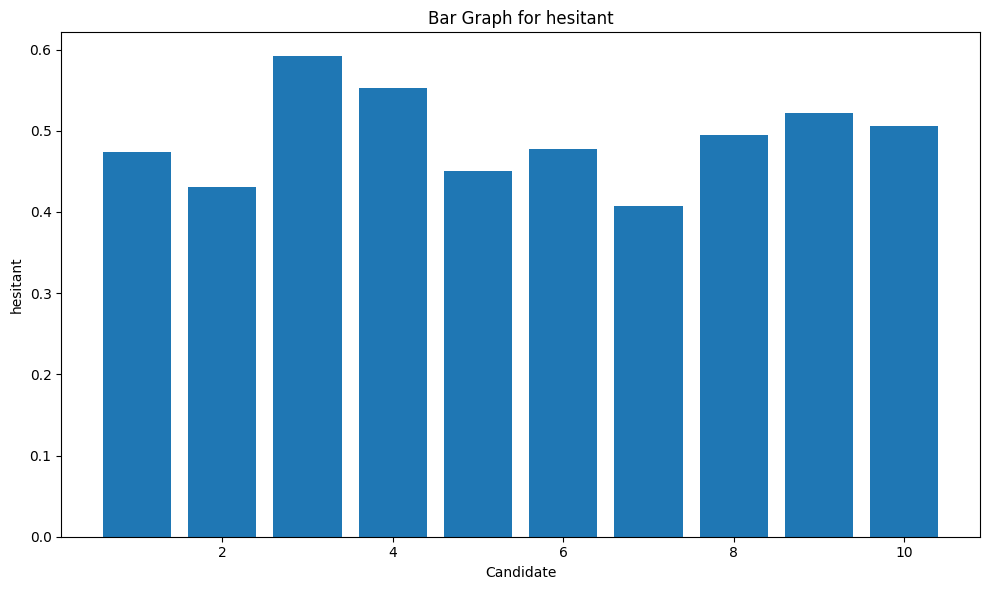

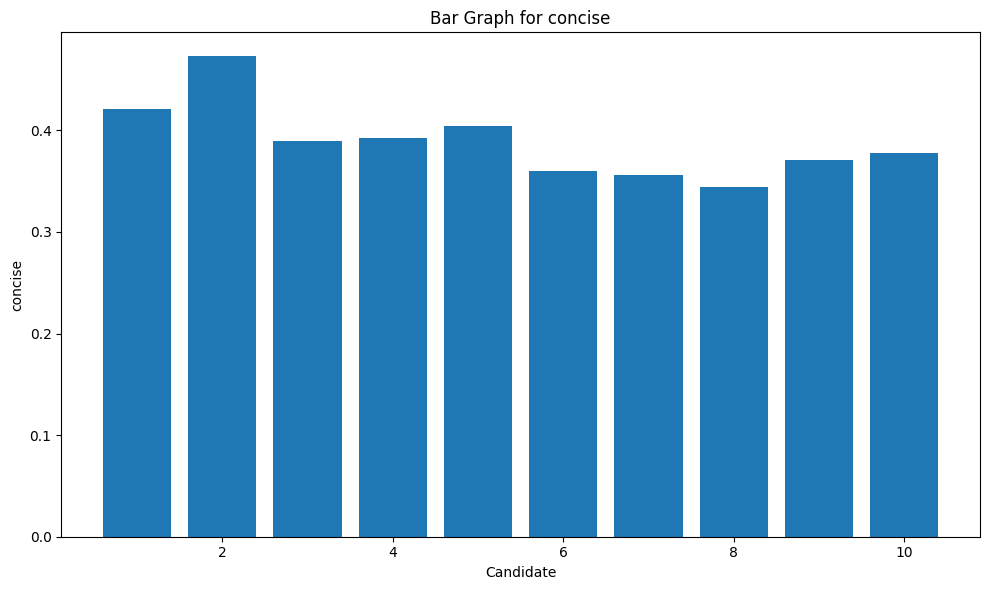

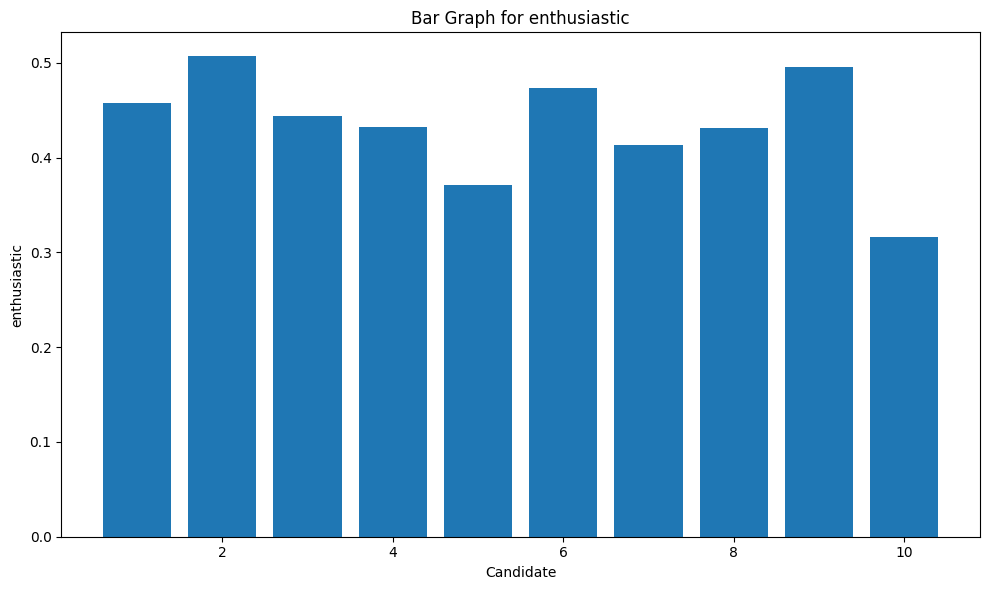

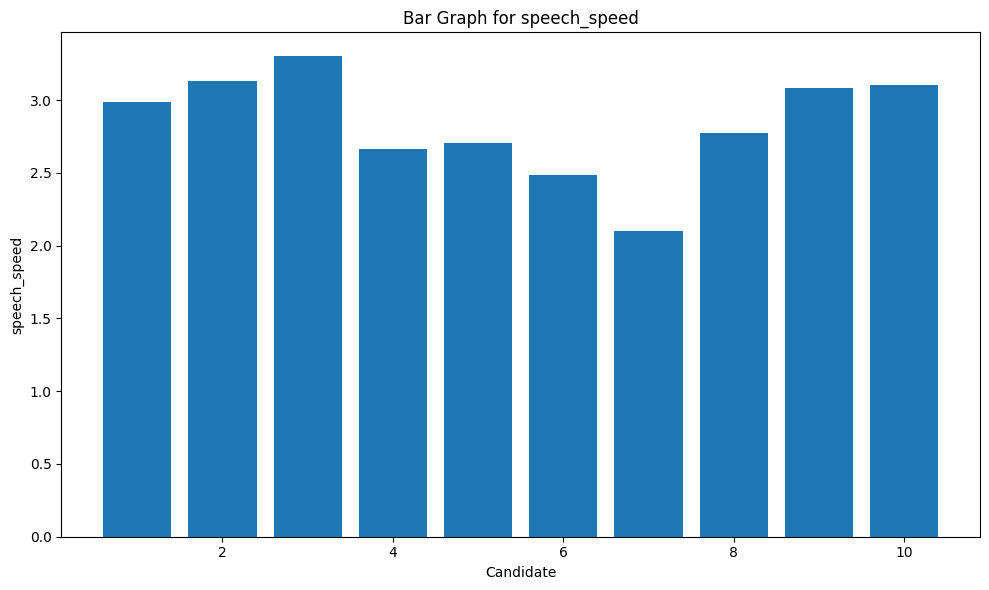

In [7]:
# Loop through each parameter and create a bar graph
for parameter in parameters:
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    plt.bar(dft_individual_parameters["Candidate"], dft_individual_parameters[parameter])
    plt.xlabel("Candidate")
    plt.ylabel(parameter)
    plt.title(f"Bar Graph for {parameter}")
    plt.xticks(rotation=0)  # Rotate x-axis labels for readability
    plt.tight_layout()

    # Save or display the graph
    # plt.savefig(f"{parameter}_bar_graph.png")  # Save as an image file
    plt.show()  # Uncomment to display the graph interactively

# If you want to show or save all the parameter graphs together, you can do that outside the loop.
# plt.show()
